In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [74]:
data = pd.read_csv("advertising.csv")

In [75]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [76]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


[]

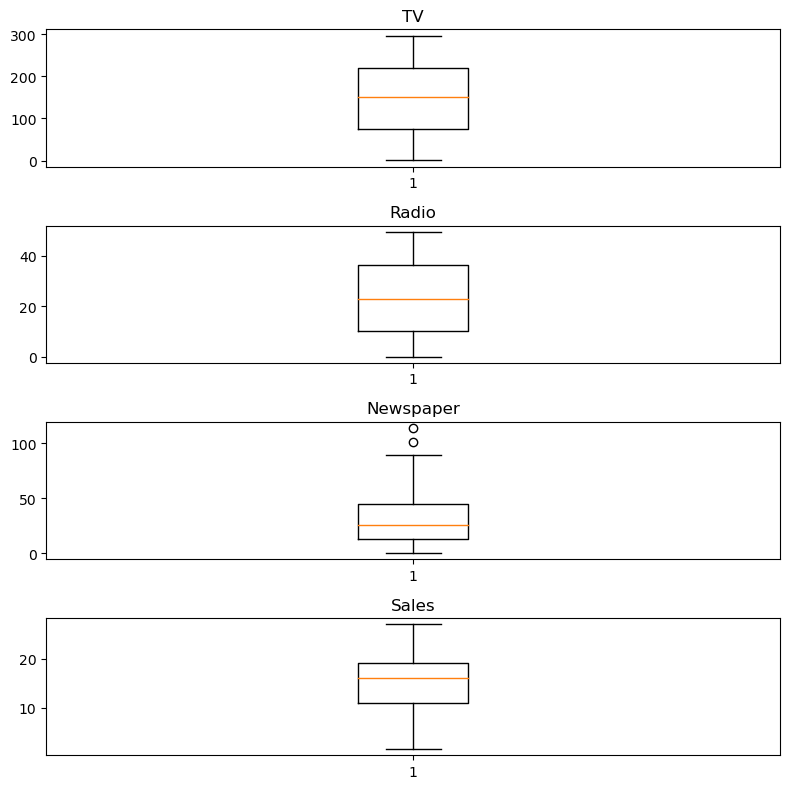

In [77]:
plt.figure(figsize = (8 ,8 ))
i =1 
for col in data.columns:
    plt.subplot(4 , 1 , i)
    plt.boxplot(data[col])
    plt.title(col)
    i += 1 
plt.tight_layout()
plt.plot()

In [78]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


[]

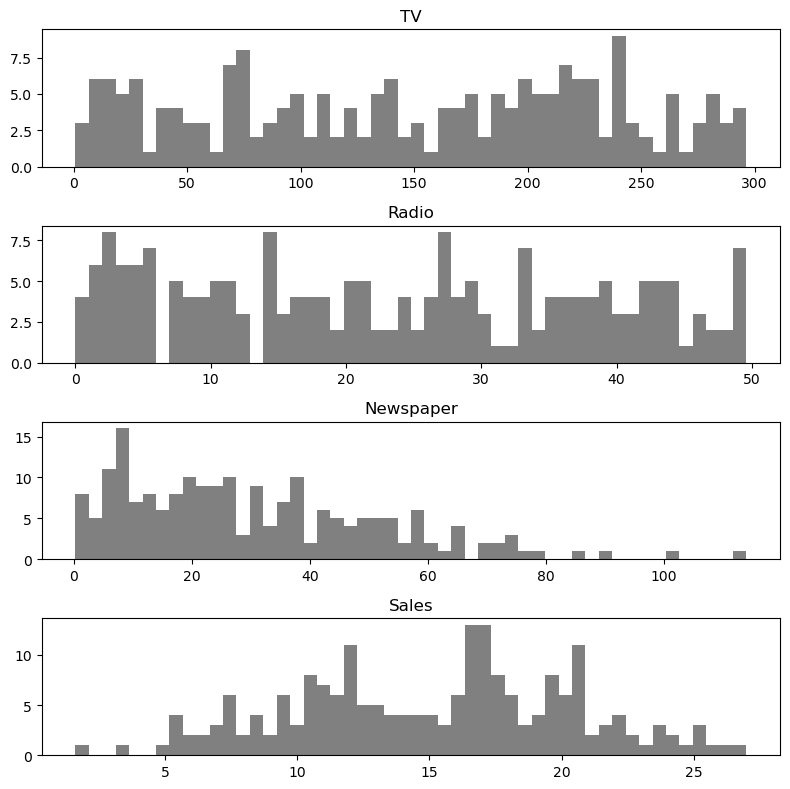

In [79]:
plt.figure(figsize = (8 ,8 ))
i =1 
for col in data.columns:
    plt.subplot(4 , 1 , i)
    plt.hist(data[col] , bins = 50 , color = 'grey')
    plt.title(col)
    i += 1 
plt.tight_layout()
plt.plot()

In [80]:
feature = list(data.columns)[:-1]
data_norm = data.copy()

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
data_norm[feature] = sc.fit_transform(data[feature])

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
x = data_norm.iloc[ : , 0 : 3]
y = data_norm.loc[: , "Sales"]

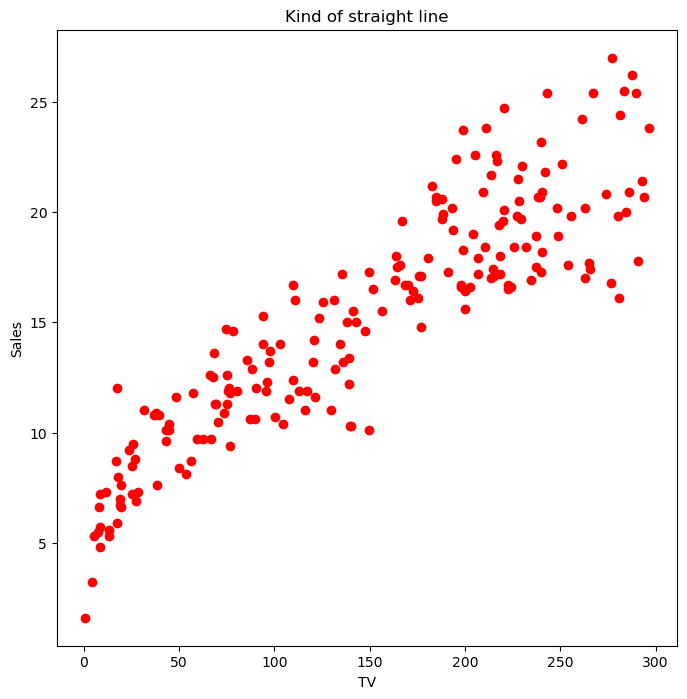

In [84]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(data["TV"] , data["Sales"] , color = "red")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Kind of straight line")
plt.show()

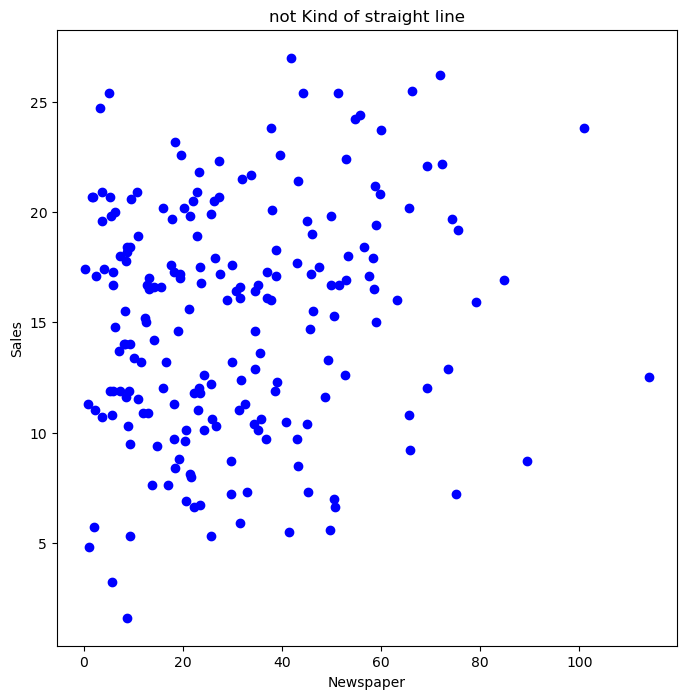

In [85]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(data["Newspaper"] , data["Sales"] , color = "blue")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("not Kind of straight line")
plt.show()

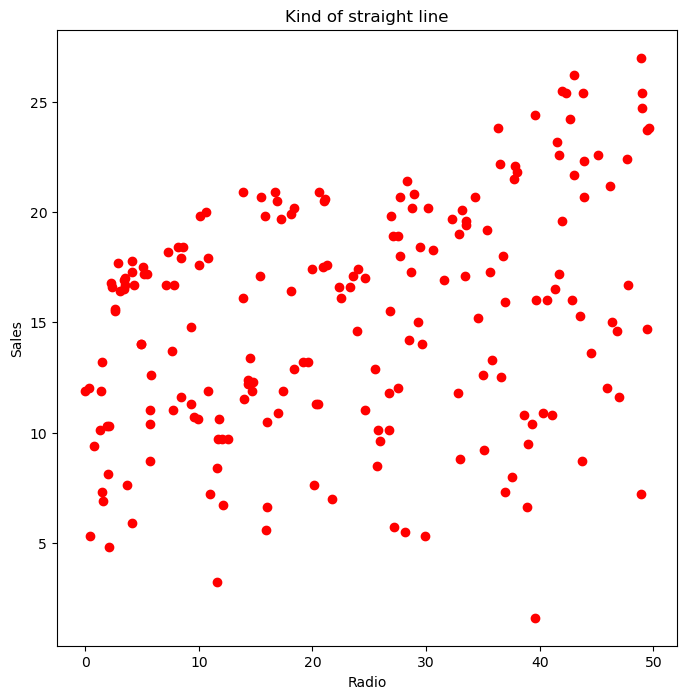

In [86]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(data["Radio"] , data["Sales"] , color = "red")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Kind of straight line")
plt.show()

In [87]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , random_state= 42 , test_size= 0.2)

In [88]:
linearregression = LinearRegression() 
linearregression.fit(xtrain , ytrain)

LinearRegression()

In [89]:
ypred = linearregression.predict(xtest)

In [90]:
r2 = r2_score(ytest, ypred)
print(f'R² score: {r2}')

mse = mean_squared_error(ytest, ypred)
print(f'Mean Squared Error: {mse}')

R² score: 0.9059011844150826
Mean Squared Error: 2.9077569102710923


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


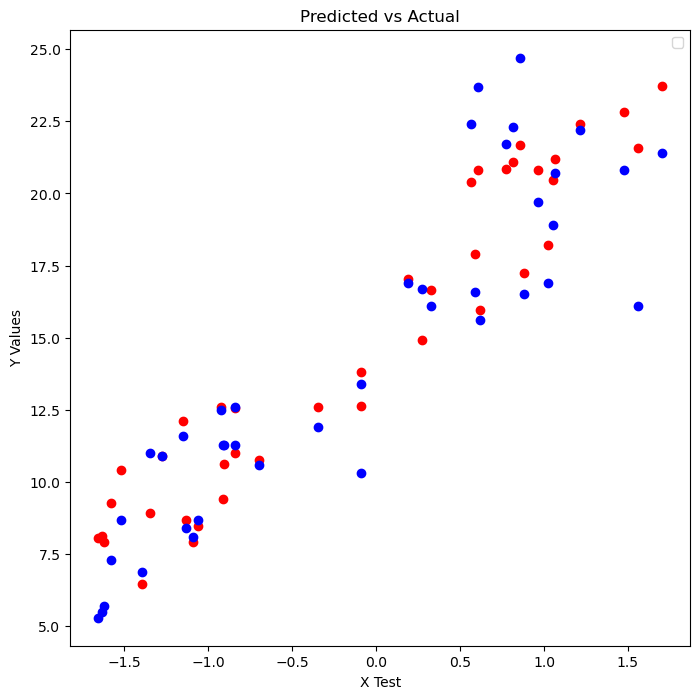

In [91]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(xtest["TV"] ,ypred , color = "red")
ax.scatter(xtest["TV"]  ,ytest , color = "blue")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")
ax.legend()
plt.show()

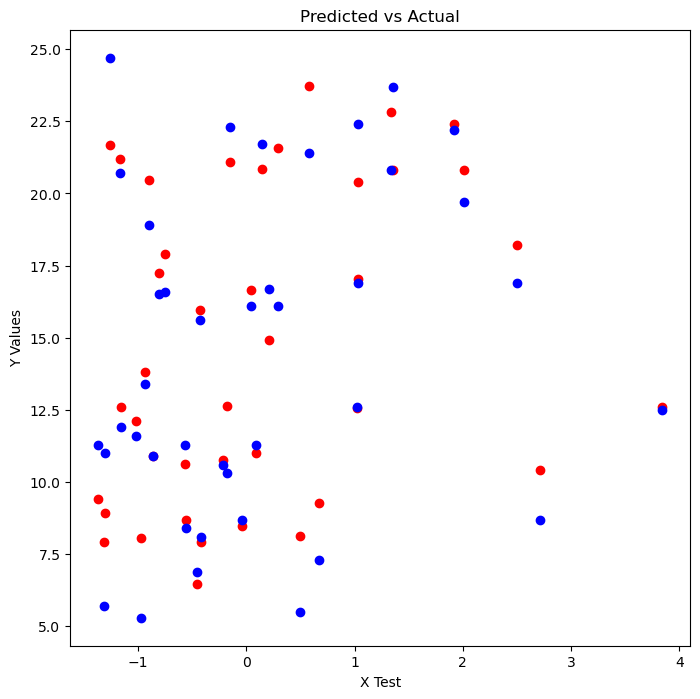

In [92]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(xtest["Newspaper"] ,ypred , color = "red")
ax.scatter(xtest["Newspaper"]  ,ytest , color = "blue")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")

plt.show()

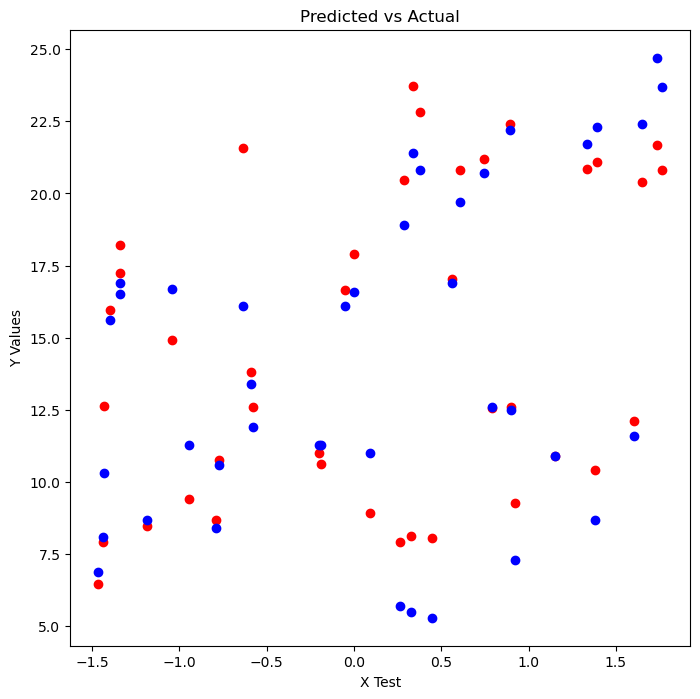

In [93]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(xtest["Radio"] ,ypred , color = "red")
ax.scatter(xtest["Radio"]  ,ytest , color = "blue")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")

plt.show()

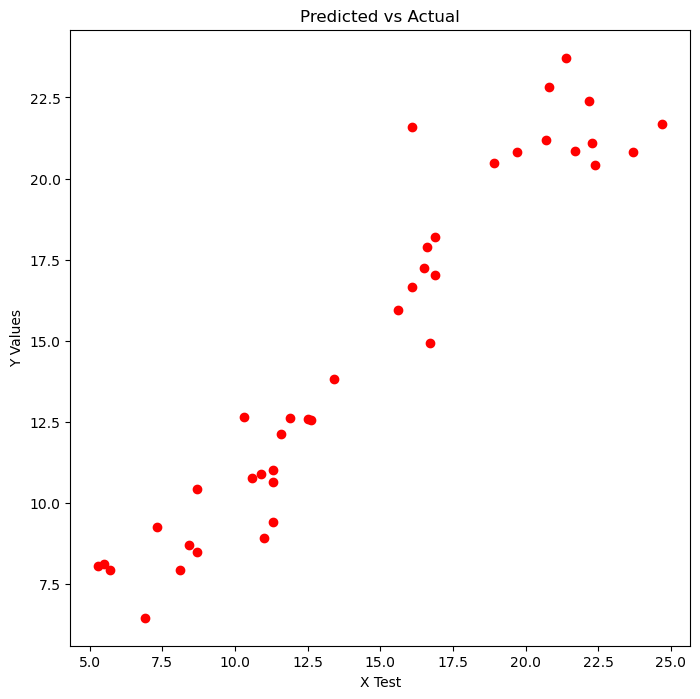

In [94]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(ytest ,ypred , color = "red")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")
plt.show()

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(xtrain)

In [99]:
poly_linear = LinearRegression()
poly_linear.fit(x_poly , ytrain)

LinearRegression()

In [100]:
predict = poly_linear.predict(poly_reg.fit_transform(xtest))

In [101]:
r2 = r2_score(ytest, predict)
print(f'R² score: {r2}')

mse = mean_squared_error(ytest, predict)
print(f'Mean Squared Error: {mse}')

R² score: 0.9533174341074799
Mean Squared Error: 1.4425426369013508


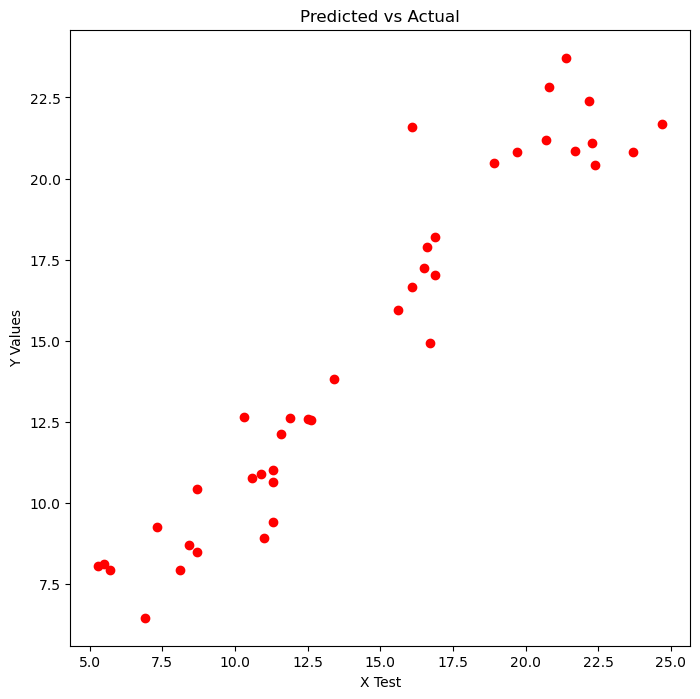

In [102]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(ytest ,ypred , color = "red")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")
plt.show()

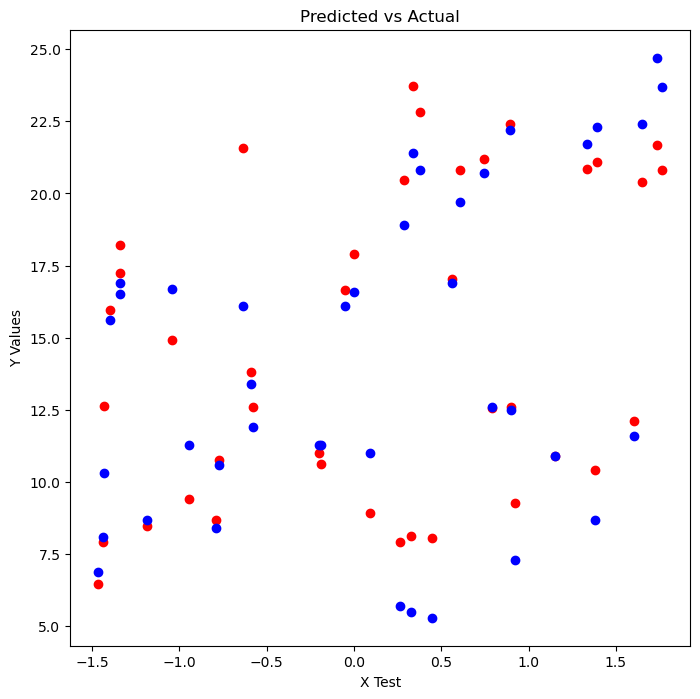

In [103]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(xtest["Radio"] ,ypred , color = "red")
ax.scatter(xtest["Radio"]  ,ytest , color = "blue")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")

plt.show()

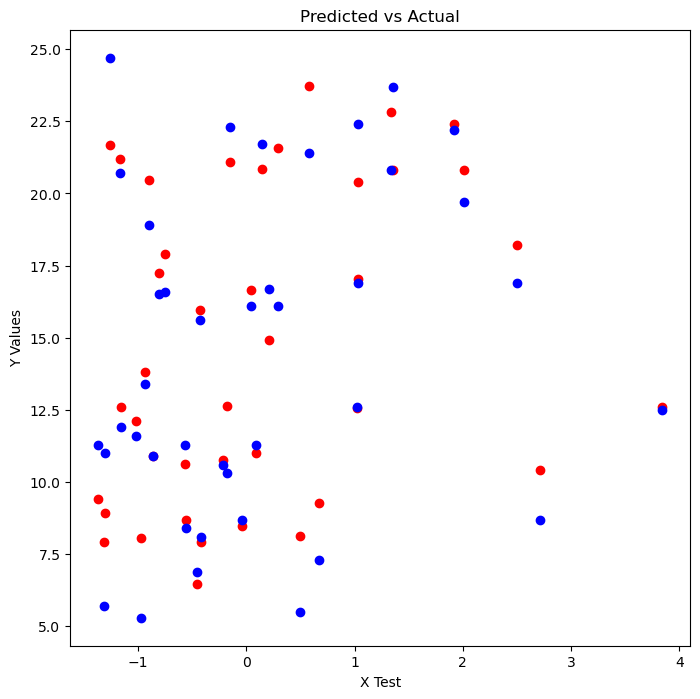

In [104]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(xtest["Newspaper"] ,ypred , color = "red")
ax.scatter(xtest["Newspaper"]  ,ytest , color = "blue")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")

plt.show()

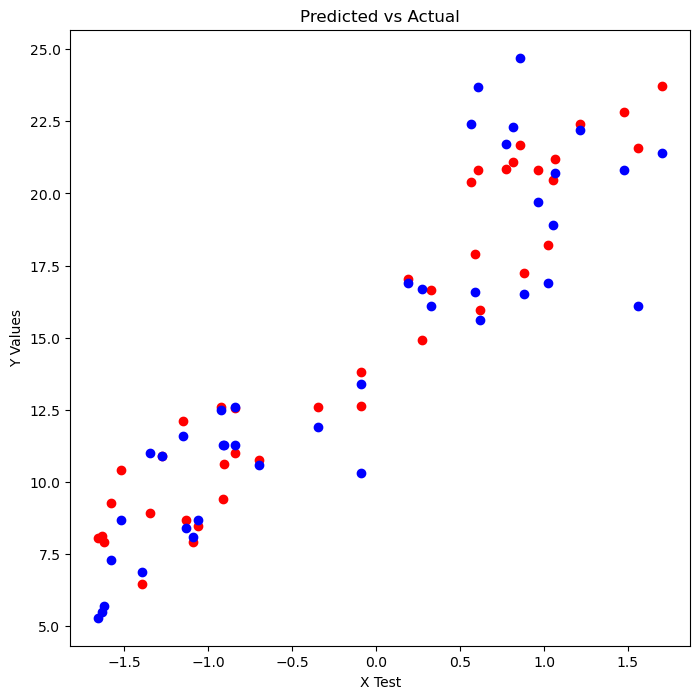

In [105]:
plt.figure(figsize = (8 , 8 )) 
ax = plt.axes()  
ax.scatter(xtest["TV"] ,ypred , color = "red")
ax.scatter(xtest["TV"]  ,ytest , color = "blue")
ax.set_title("Predicted vs Actual")
ax.set_xlabel("X Test")
ax.set_ylabel("Y Values")
plt.show()